### Import Dependencies

In [1]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Dataset sample

In [2]:
path1 = "./throughwalk_forludlows.csv"
data = pd.read_csv(path1, header=None).values
amp = data[:,1:65]
a = pd.DataFrame(amp).apply(pd.to_numeric, errors='coerce').values
a = np.nan_to_num(a)

In [3]:
display(pd.DataFrame(a))

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,2844.155059,645.849828,645.383607,627.803313,627.072564,605.498968,606.972817,595.733162,573.254743,579.338416,...,737.800108,743.548922,732.546927,729.284581,720.401277,708.240778,699.820691,687.439452,679.153885,662.966817
1,2844.155059,659.245781,640.366301,636.491163,625.339108,616.477899,606.139423,592.251636,569.385634,556.970376,...,759.582122,743.006057,732.961118,730.924073,714.689443,706.813271,696.646252,688.704581,679.379128,680.254364
2,2844.155059,698.032951,691.922684,704.762371,714.727920,723.575843,732.234935,746.525284,749.914662,757.079917,...,723.586208,719.292013,716.497732,712.832379,704.025568,697.071732,692.856406,687.247408,681.883421,688.419930
3,2844.155059,750.473184,714.741911,733.672952,739.970270,751.400027,756.224834,769.415362,776.228059,796.203492,...,760.641834,748.840437,746.496484,741.194981,732.985675,733.180060,725.672791,719.413650,714.280757,733.148007
4,2844.155059,625.731572,626.000799,614.733275,604.952891,590.877314,582.494635,574.544167,575.521503,548.470601,...,738.393527,732.349643,727.252363,721.754806,696.083328,688.616729,691.147596,685.088315,673.171598,650.665044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,2844.155059,619.229360,615.958603,593.872882,581.485167,563.554789,554.589939,534.480121,537.676483,519.761484,...,787.553173,780.201256,763.398323,756.746325,745.984584,726.371806,709.440625,685.936586,658.847479,645.886987
5978,2844.155059,630.600507,623.417196,613.802085,603.186538,581.622730,566.971781,565.827712,530.008490,530.935966,...,791.571222,779.975641,768.010417,773.369252,743.764748,733.485515,723.354685,704.085932,685.376539,660.825242
5979,2844.155059,648.189016,620.732632,610.573501,607.000824,593.296722,579.193405,572.263051,554.692708,547.671434,...,808.689063,802.022444,793.310154,778.281440,766.997392,748.348849,733.308257,708.985895,684.691171,666.000751
5980,2844.155059,648.988444,619.717678,616.730898,603.291803,592.912304,572.800140,566.540378,550.058179,544.031249,...,809.229881,789.375703,786.771250,766.932200,754.718491,744.264738,720.739898,701.909538,685.521699,672.502788


### Amplitude plot

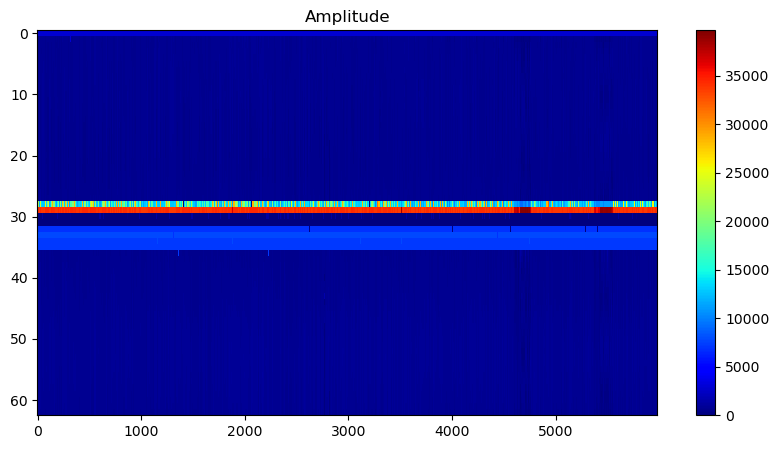

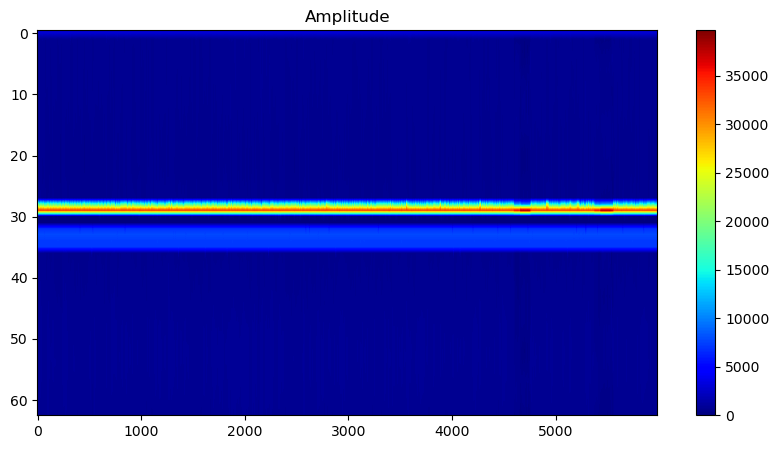

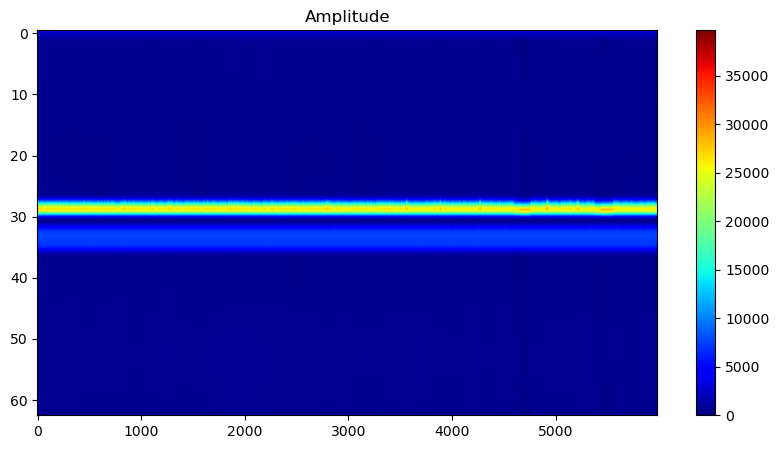

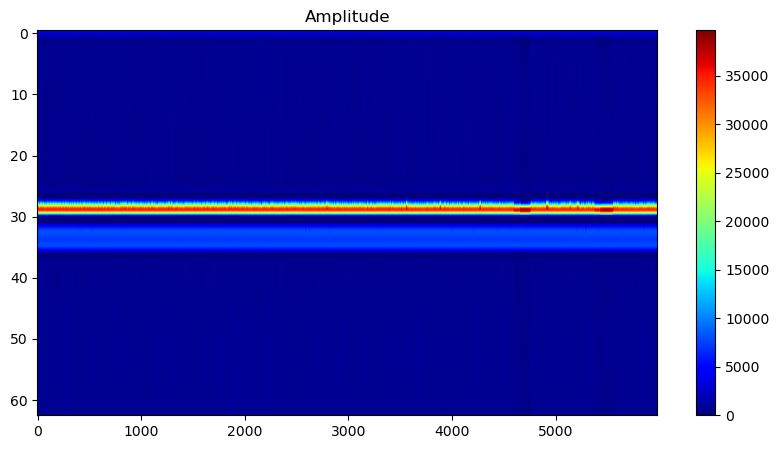

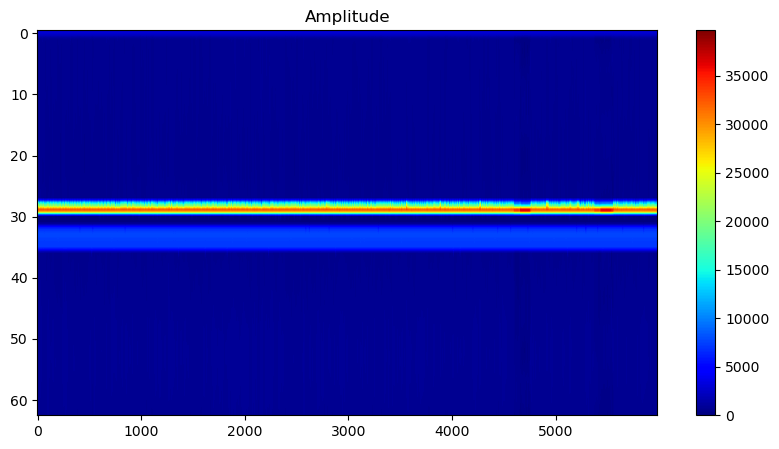

In [4]:
fig = plt.figure(figsize = (10,5))
ax1 = plt.plot(311)
plt.imshow(a[:,0:63].T,interpolation = "nearest", aspect = "auto", cmap="jet")
ax1 = plt.title("Amplitude")
plt.colorbar()

fig = plt.figure(figsize = (10,5))
ax1 = plt.plot(211)
plt.imshow(a[:,0:63].T,interpolation = "bilinear", aspect = "auto", cmap="jet")
ax1 = plt.title("Amplitude")
plt.colorbar()

fig = plt.figure(figsize = (10,5))
ax1 = plt.plot(311)
plt.imshow(a[:,0:63].T,interpolation = "bicubic", aspect = "auto", cmap="jet")
ax1 = plt.title("Amplitude")
plt.colorbar()

fig = plt.figure(figsize = (10,5))
ax1 = plt.plot(111)
plt.imshow(a[:,0:63].T,interpolation = "spline36", aspect = "auto", cmap="jet")
ax1 = plt.title("Amplitude")
plt.colorbar()

fig = plt.figure(figsize = (10,5))
ax1 = plt.plot(111)
plt.imshow(a[:,0:63].T,interpolation = "hamming", aspect = "auto", cmap="jet")
ax1 = plt.title("Amplitude")
plt.colorbar()
plt.show()

### PCA Component Visualization

In [5]:
def moving_average(data, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

def visualize(path1):

    data = pd.read_csv(path1, header=None).values
    amp = data[:,1:65]
    a = pd.DataFrame(amp).apply(pd.to_numeric, errors='coerce').values
    a = np.nan_to_num(a)

    constant_offset = np.empty_like(a)
    filtered_data = np.empty_like(a)

    for i in range(1, len(a[0])):
        constant_offset[:,i] = moving_average(a[:,i], 4000)

    filtered_data = a - constant_offset

    for i in range(1, len(a[0])):
        filtered_data[:,i] = moving_average(filtered_data[:,i], 10)
    
    cov_mat2 = np.cov(filtered_data.T)
    eig_val2, eig_vec2 = np.linalg.eig(cov_mat2)

    idx = eig_val2.argsort()[::-1]
    eig_val2 = eig_val2[idx]
    eig_vec2 = eig_vec2[:,idx]

    pca_data2 = filtered_data.dot(eig_vec2)
    xmin = 0
    xmax = 20000

    fig1 = plt.figure(figsize = (18,20))
    
    ax1 = plt.subplot(811)
    plt.plot(pca_data2[xmin:xmax,0])
    ax1 = plt.title("PCA 1st component")
    plt. show()

    fig2 = plt.figure(figsize = (18,20))

    ax2 = plt.subplot(812)
    plt.plot(pca_data2[xmin:xmax,1])
    #plt.plot(pca_data2[2500:17500,1])
    ax2.set_title("PCA 2nd component")

    plt.show()

    fig3 = plt.figure(figsize = (18,20))
    
    ax3 = plt.subplot(813)
    plt.plot(pca_data2[xmin:xmax,2])
    #plt.plot(pca_data2[2500:17500,2])
    ax3.set_title("PCA 3rd component")

    plt.show()

    fig3 = plt.figure(figsize = (18,20))

    ax3 = plt.subplot(814)
    plt.plot(pca_data2[xmin:xmax,3])
    #plt.plot(pca_data2[2500:17500,2])
    ax3.set_title("PCA 4 component")

    plt.show()

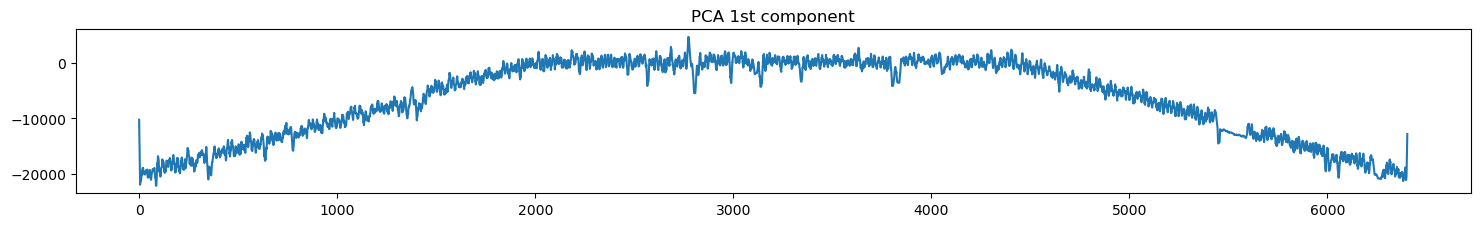

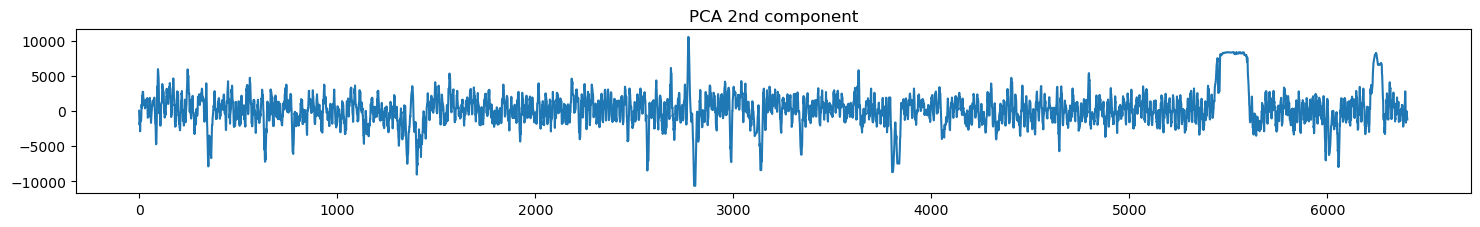

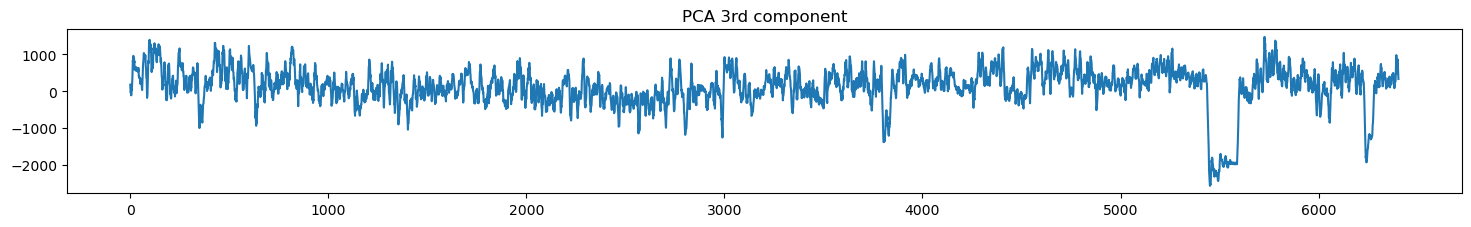

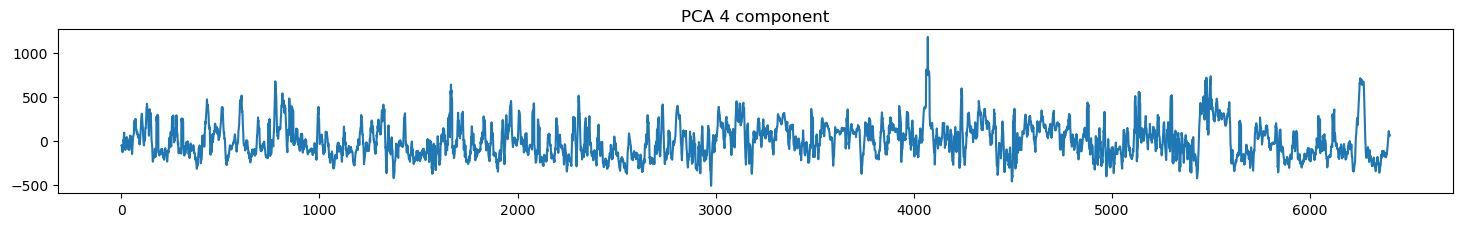

In [6]:
visualize(path1 = "./throughrun_forludlows.csv")

### Spectrogram (STFT)

In [7]:
def moving_average(data, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

def visualize(path1):

    data = pd.read_csv(path1, header=None).values
    amp = data[:,1:65]
    a = pd.DataFrame(amp).apply(pd.to_numeric, errors='coerce').values
    a = np.nan_to_num(a)

    constant_offset = np.empty_like(a)
    filtered_data = np.empty_like(a)

    for i in range(1, len(a[0])):
        constant_offset[:,i] = moving_average(a[:,i], 4000)

    filtered_data = a - constant_offset

    for i in range(1, len(a[0])):
        filtered_data[:,i] = moving_average(filtered_data[:,i], 10)
    
    cov_mat2 = np.cov(filtered_data.T)
    eig_val2, eig_vec2 = np.linalg.eig(cov_mat2)

    idx = eig_val2.argsort()[::-1]
    eig_val2 = eig_val2[idx]
    eig_vec2 = eig_vec2[:,idx]

    pca_data2 = filtered_data.dot(eig_vec2)
    xmin = 0
    xmax = 20000

    plt.figure(figsize = (18,30))
    # Spectrogram(STFT)
    plt.subplot(211)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,0], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.figure(figsize = (18,30))

    plt.subplot(212)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,1], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.figure(figsize = (18,30))

    plt.subplot(212)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,2], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

    plt.figure(figsize = (18,30))

    plt.subplot(212)
    Pxx, freqs, bins, im = plt.specgram(pca_data2[:,3], NFFT=128, Fs=1000, noverlap=1, cmap="jet", vmin=-100,vmax=20)
    plt.xlabel("Time[s]")
    plt.ylabel("Frequency [Hz]")
    plt.title("Spectrogram(STFT)")
    plt.colorbar(im)
    plt.xlim(0,10)
    plt.ylim(0,100)

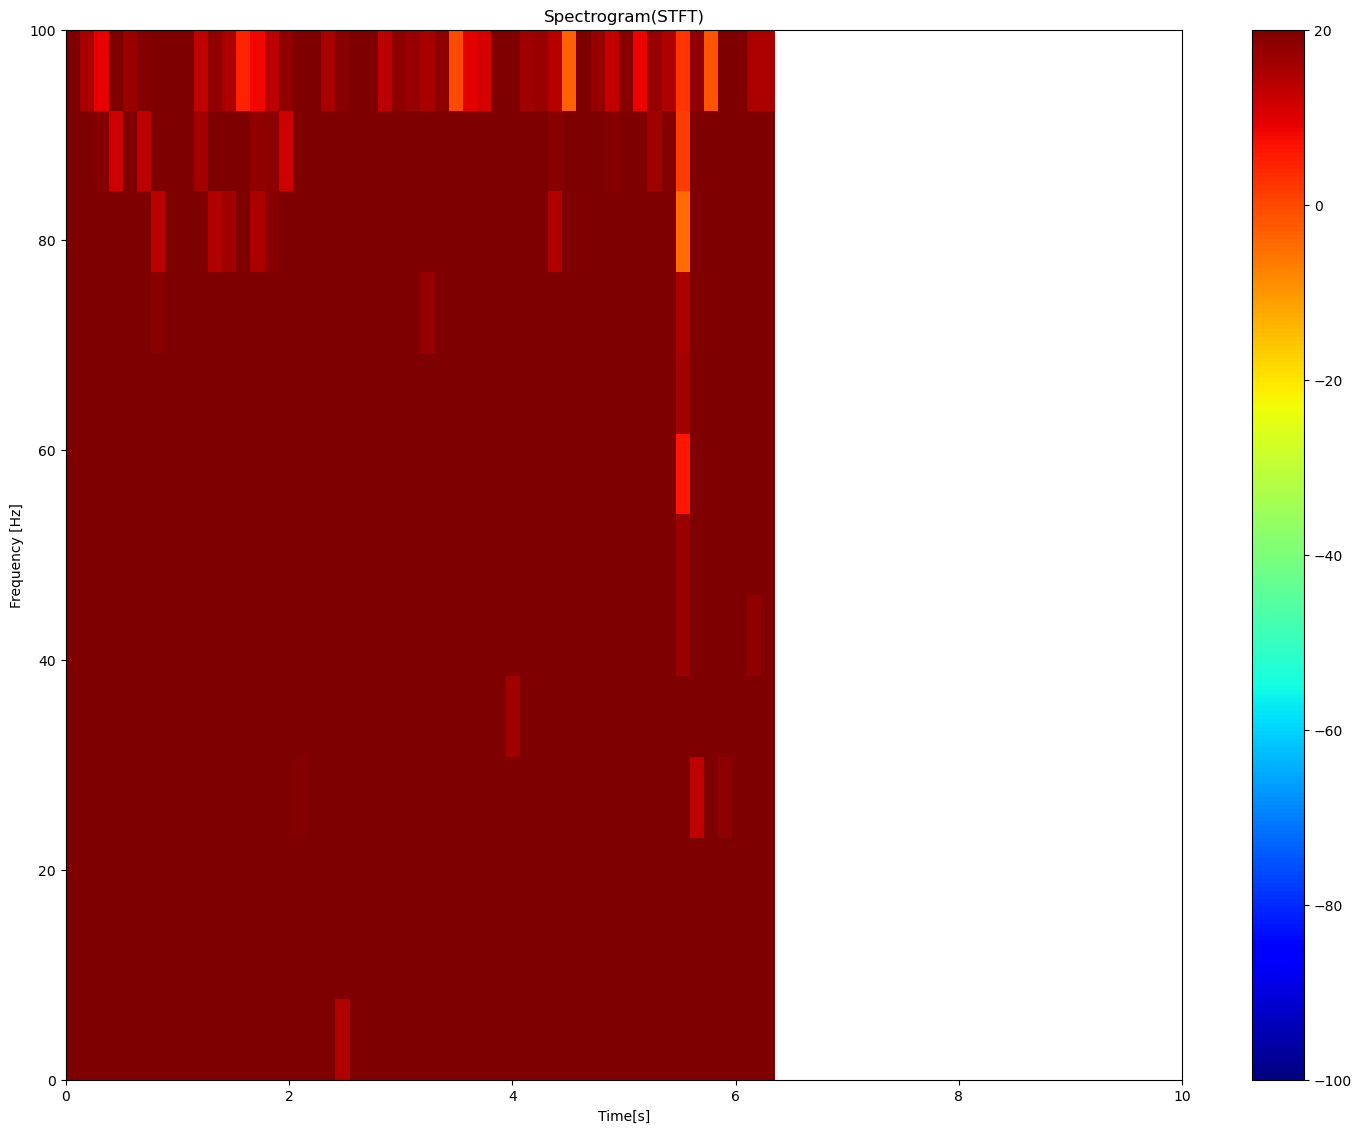

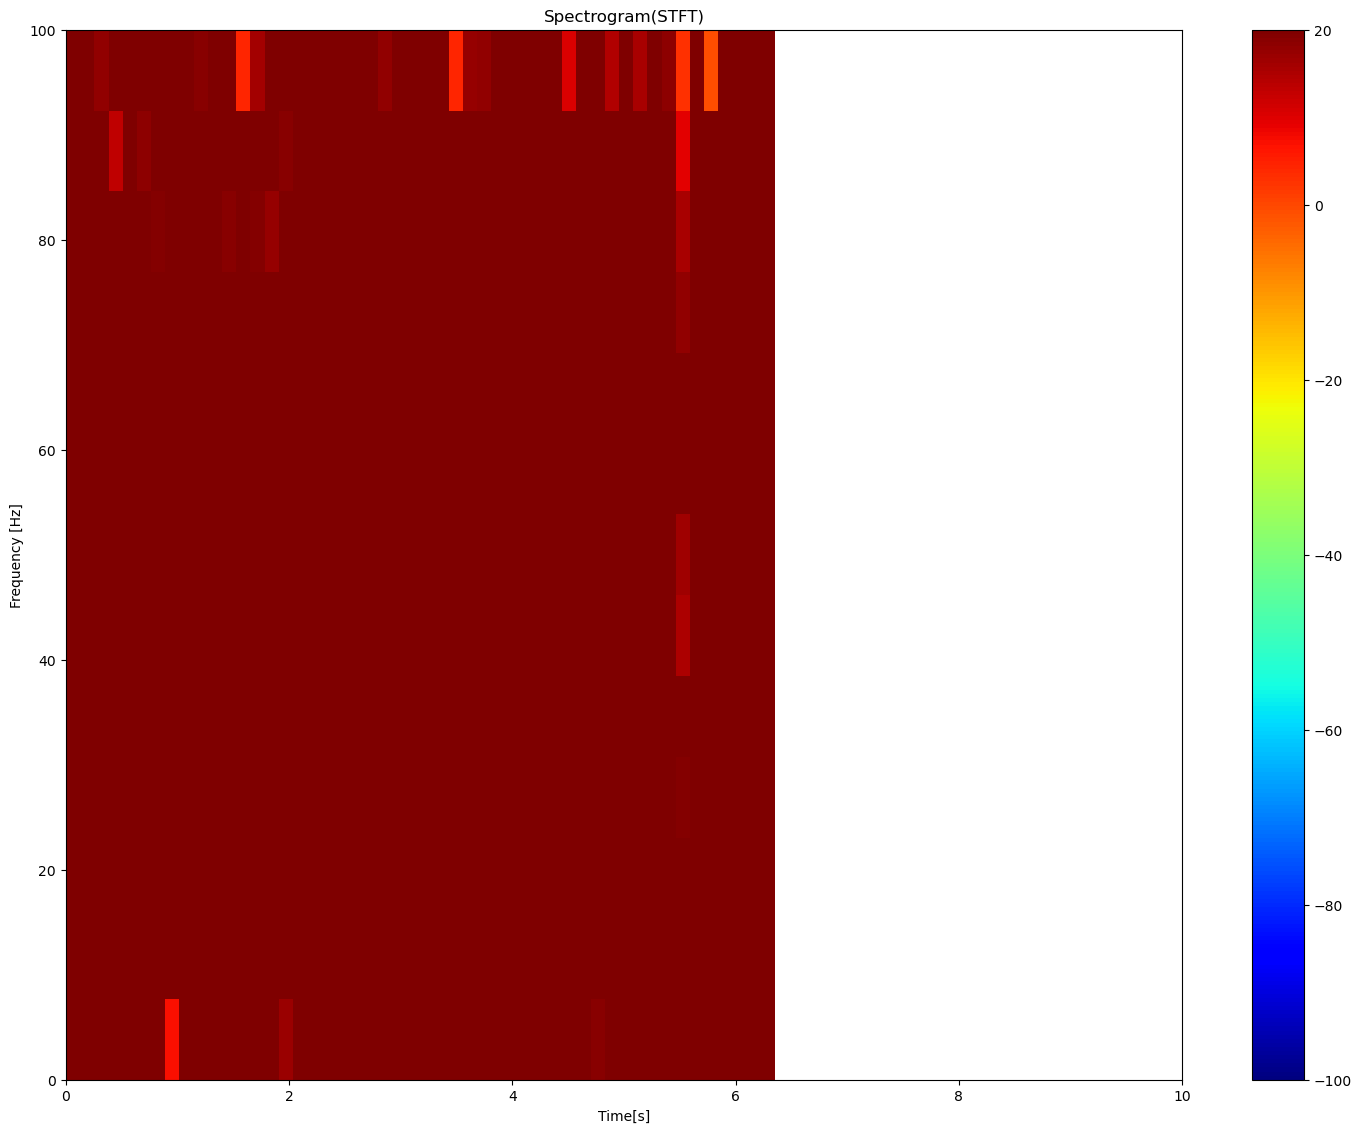

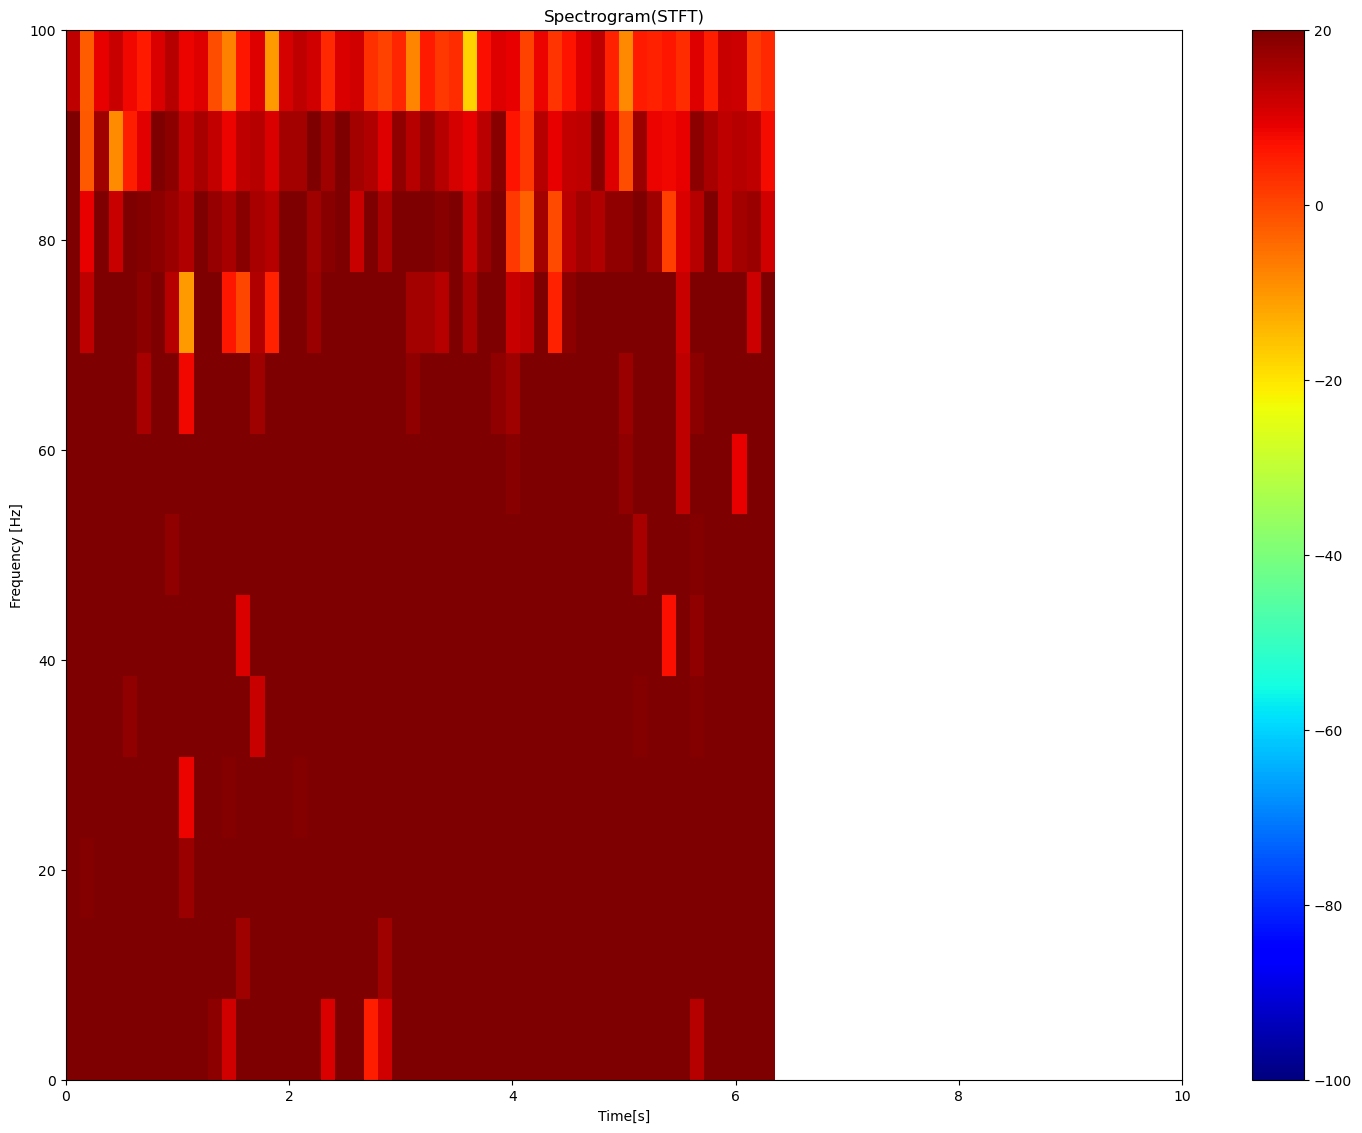

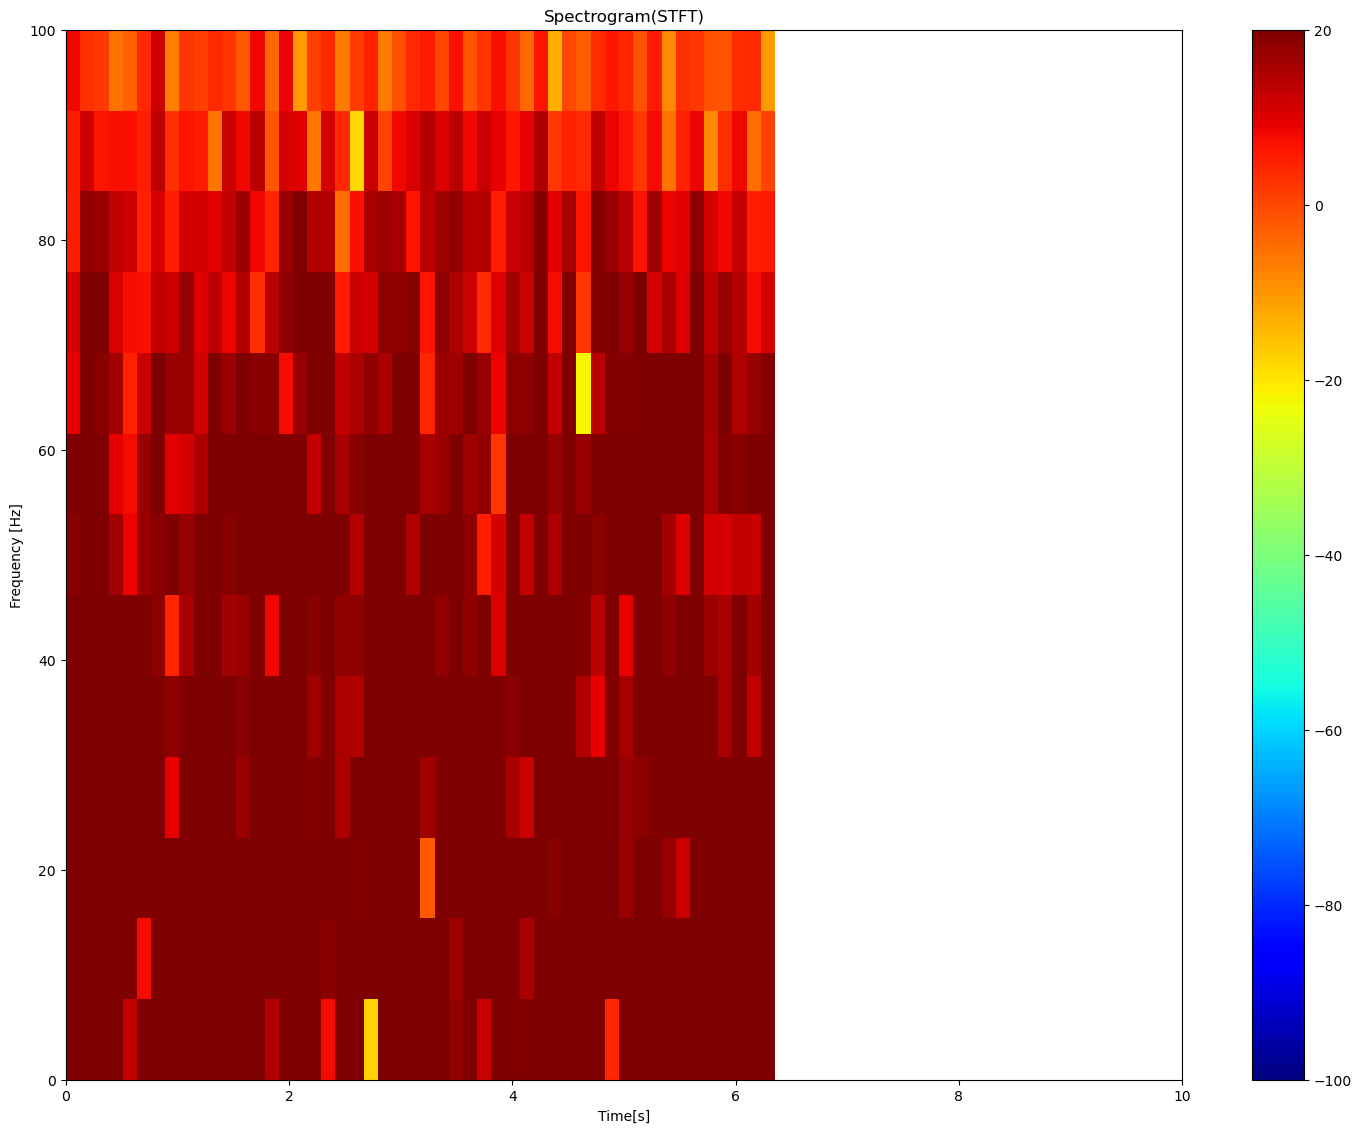

In [8]:
visualize(path1 = "./throughrun_forludlows.csv")